In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ydata_profiling import ProfileReport
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
chor_training = pd.read_csv('Data/Final datasets/chor_training_data.csv',sep=',')
cle_training = pd.read_csv('Data/Final datasets/cle_training_data.csv',sep=',')
turi_training = pd.read_csv('Data/Final datasets/turi_training_data.csv',sep=',')
rod_training = pd.read_csv('Data/Final datasets/rod_training_data.csv',sep=',')

In [3]:
training_data = pd.read_csv('Data/Final datasets/full_training_data.csv',sep=',')

In [4]:
pm10 = pd.read_csv('Data/Final datasets/pm10_training_data.csv',sep=',')
no2 = pd.read_csv('Data/Final datasets/no2_training_data.csv',sep=',')
o3 = pd.read_csv('Data/Final datasets/o3_training_data.csv',sep=',')

In [5]:
chor_training['Date'] = pd.to_datetime(chor_training['Date'])
cle_training['Date'] = pd.to_datetime(cle_training['Date'])
turi_training['Date'] = pd.to_datetime(turi_training['Date'])
rod_training['Date'] = pd.to_datetime(rod_training['Date'])


In [6]:
chor_training = chor_training.set_index('Date')
cle_training = cle_training.set_index('Date')
turi_training = turi_training.set_index('Date')
rod_training = rod_training.set_index('Date')

chor_training.index = pd.to_datetime(chor_training.index)
cle_training.index = pd.to_datetime(cle_training.index)
turi_training.index = pd.to_datetime(turi_training.index)
rod_training.index = pd.to_datetime(rod_training.index)


In [7]:
pm10['Date'] = pd.to_datetime(pm10['Date'])
no2['Date'] = pd.to_datetime(no2['Date'])
o3['Date'] = pd.to_datetime(o3['Date'])

pm10 = pm10.set_index('Date')
no2 = no2.set_index('Date')
o3 = o3.set_index('Date')

pm10.index = pd.to_datetime(pm10.index)
no2.index = pd.to_datetime(no2.index)
o3.index = pd.to_datetime(o3.index)


training_data['Date'] = pd.to_datetime(training_data['Date'])
training_data = training_data.set_index('Date')
training_data.index = pd.to_datetime(training_data.index)

In [14]:

pm10 = pm10.interpolate(method='linear')
no2  = no2.interpolate(method='linear')
o3 = o3.interpolate(method='linear')


chor_training_resampled_1H = chor_training[['PM_10','NO2','O3']].resample('1H').mean()
chor_training_resampled_1H = chor_training_resampled_1H.interpolate(method='linear')
chor_training_resampled_1D = chor_training[['PM_10','NO2','O3']].resample('1D').mean()
chor_training_resampled_1D = chor_training_resampled_1D.interpolate(method='linear')

cle_training_resampled_1H = cle_training[['PM_10','NO2']].resample('1H').mean()
cle_training_resampled_1H = cle_training_resampled_1H.interpolate(method='linear')
cle_training_resampled_1D = cle_training[['PM_10','NO2']].resample('1D').mean()
cle_training_resampled_1D = cle_training_resampled_1D.interpolate(method='linear')

turi_training_resampled_1H = turi_training[['PM_10','NO2']].resample('1H').mean()
turi_training_resampled_1H = turi_training_resampled_1H.interpolate(method='linear')

turi_training_resampled_1D = turi_training[['PM_10','NO2']].resample('1D').mean()
turi_training_resampled_1D = turi_training_resampled_1D.interpolate(method='linear')

rod_training_resampled_1H = rod_training[['PM_10','NO2','O3']].resample('1H').mean()
rod_training_resampled_1H = rod_training_resampled_1H.interpolate(method='linear')
rod_training_resampled_1D = rod_training[['PM_10','NO2','O3']].resample('1D').mean()
rod_training_resampled_1D = rod_training_resampled_1D.interpolate(method='linear')

C:\Users\riven\AppData\Local\Temp\ipykernel_18916\2698488946.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  pm10 = pm10.interpolate(method='linear')
C:\Users\riven\AppData\Local\Temp\ipykernel_18916\2698488946.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  no2  = no2.interpolate(method='linear')
C:\Users\riven\AppData\Local\Temp\ipykernel_18916\2698488946.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  o3 = o3.interpolate(method='linear')
C:\Users\riven\AppData\Local\Temp\ipykernel_18916\2698488946.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.


In [20]:
rod_training_resampled_1H = rod_training_resampled_1H.dropna()
rod_training_resampled_1D = rod_training_resampled_1D.dropna()

chor_training_resampled_1H = chor_training_resampled_1H.dropna()
chor_training_resampled_1D = chor_training_resampled_1D.dropna()

## Descriptive analysis

#### All descriptive table

In [8]:
training_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PM_10,77171.0,15.00,7.27,0.0,10.0,14.0,19.00,61.0
O3,37850.0,47.52,29.83,0.0,25.0,47.0,65.75,197.0
NO2,76512.0,25.42,15.63,0.0,14.0,22.0,34.00,156.0
Humidity,75497.0,70.71,18.14,12.5,58.2,74.2,84.90,100.0
NO,58266.0,13.05,15.37,7.0,7.0,7.0,12.00,345.0
Temperature,75497.0,12.96,7.44,-9.1,7.7,12.2,18.30,38.8
Windspeed,75312.0,2.20,1.50,0.0,1.1,1.8,2.90,12.8
WindDirection,71980.0,177.33,89.32,0.0,118.0,190.0,234.00,360.0
Precipitation,75932.0,0.09,0.46,0.0,0.0,0.0,0.00,20.1
PM_2.5,23617.0,9.63,6.05,0.0,5.0,8.0,12.00,41.0


In [9]:
chor_training.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PM_10,19404.0,15.00,7.36,0.0,10.0,14.0,19.0,55.0
O3,19011.0,50.01,29.60,0.0,29.0,50.0,68.0,193.0
NO2,19081.0,17.24,12.50,0.0,8.0,14.0,23.0,83.0
Humidity,18868.0,72.75,19.06,13.8,59.4,76.9,88.5,100.0
NO,14632.0,9.13,10.89,7.0,7.0,7.0,7.0,172.0
Temperature,18868.0,12.67,7.49,-8.6,7.5,11.9,17.9,38.3
Windspeed,18776.0,2.83,1.59,0.0,1.6,2.6,3.7,12.8
WindDirection,18258.0,193.89,88.09,0.0,132.0,190.0,265.0,360.0
Precipitation,18983.0,0.09,0.46,0.0,0.0,0.0,0.0,20.1


In [10]:
cle_training.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PM_10,19452.0,16.30,7.60,2.0,11.0,15.0,20.0,61.0
NO2,19140.0,32.44,16.35,1.0,20.0,30.0,42.0,133.0
PM_2.5,11451.0,9.80,5.93,0.0,6.0,8.0,12.0,41.0
Humidity,18911.0,68.22,16.68,13.9,56.8,72.0,81.6,100.0
NO,14567.0,19.53,20.89,7.0,7.0,11.0,23.0,345.0
Temperature,18911.0,13.44,7.35,-7.8,8.2,12.7,18.8,37.5
Windspeed,18905.0,1.83,1.34,0.2,1.0,1.4,2.2,12.0
WindDirection,18075.0,156.91,90.02,0.0,57.0,186.0,221.0,360.0
Precipitation,18983.0,0.09,0.46,0.0,0.0,0.0,0.0,20.1


In [11]:
turi_training.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PM_10,19304.0,14.61,7.19,1.0,10.0,13.0,18.0,59.0
NO2,19013.0,28.68,14.32,2.0,18.0,26.0,36.0,156.0
PM_2.5,11469.0,9.22,5.88,1.0,5.0,8.0,12.0,39.0
Humidity,18847.0,66.87,17.08,12.5,54.9,70.7,80.5,100.0
NO,14403.0,14.47,14.89,7.0,7.0,8.0,16.0,261.0
Temperature,18847.0,13.65,7.40,-6.0,8.4,12.9,19.1,37.9
Windspeed,18781.0,1.75,1.37,0.0,0.9,1.3,2.1,12.0
WindDirection,17834.0,167.55,85.86,0.0,80.0,195.0,225.0,360.0
Precipitation,18983.0,0.09,0.46,0.0,0.0,0.0,0.0,20.1


In [12]:
rod_training.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PM_10,19011.0,14.06,6.71,1.0,10.0,13.0,17.0,59.0
NO2,19278.0,23.35,14.74,0.6,13.0,20.0,31.0,156.0
PM_2.5,697.0,13.50,8.70,2.0,6.0,13.0,19.0,38.0
Humidity,18871.0,75.00,18.44,18.4,63.0,79.2,90.9,100.0
NO,14664.0,9.13,9.72,7.0,7.0,7.0,7.0,199.0
O3,18839.0,45.01,29.86,0.1,21.0,44.0,63.0,197.0
Temperature,18871.0,12.08,7.43,-9.1,7.0,11.4,17.1,38.8
Windspeed,18850.0,2.38,1.43,0.0,1.3,2.1,3.1,12.0
WindDirection,17813.0,190.88,87.76,0.0,126.0,187.0,264.0,360.0
Precipitation,18983.0,0.09,0.46,0.0,0.0,0.0,0.0,20.1


Test for stationary 

In [15]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print(f'Result: {result[1] < 0.05}')

In [17]:
#pm10
adf_test(chor_training_resampled_1H['PM_10'])
adf_test(cle_training_resampled_1H['PM_10'])
adf_test(turi_training_resampled_1H['PM_10'])
adf_test(rod_training_resampled_1H['PM_10'])

ADF Statistic: -9.984894178286098
p-value: 2.0679149117870544e-17
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True
ADF Statistic: -10.443236049382383
p-value: 1.50298148670012e-18
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True
ADF Statistic: -10.6797920722979
p-value: 3.9674017712300275e-19
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True
ADF Statistic: -10.230828361946825
p-value: 5.034200356989698e-18
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True


PM_10 is stationary.

In [18]:
adf_test(chor_training_resampled_1H['NO2'])
adf_test(cle_training_resampled_1H['NO2'])
adf_test(turi_training_resampled_1H['NO2'])
adf_test(rod_training_resampled_1H['NO2'])

ADF Statistic: -11.213718192713381
p-value: 2.0946594943227684e-20
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True
ADF Statistic: -12.673020724011515
p-value: 1.2327574202774026e-23
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True
ADF Statistic: -12.67766123149036
p-value: 1.2059657960992239e-23
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True
ADF Statistic: -9.834395361319935
p-value: 4.939468396699097e-17
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True


NO2 is also stationary

In [21]:
adf_test(chor_training_resampled_1H['O3'])
adf_test(rod_training_resampled_1H['O3'])

ADF Statistic: -8.38381727262443
p-value: 2.4690644747334494e-13
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True
ADF Statistic: -8.7900399613511
p-value: 2.253488792122573e-14
Critical Values:
   1%: -3.430682679895407
   5%: -2.861687032680996
   10%: -2.5668482615029355
Result: True


O3 is stationary

Test for auto correlation

In [39]:
def acf_test(series):
    plot_acf(series, lags=720,alpha=0.01)
    plt.show()

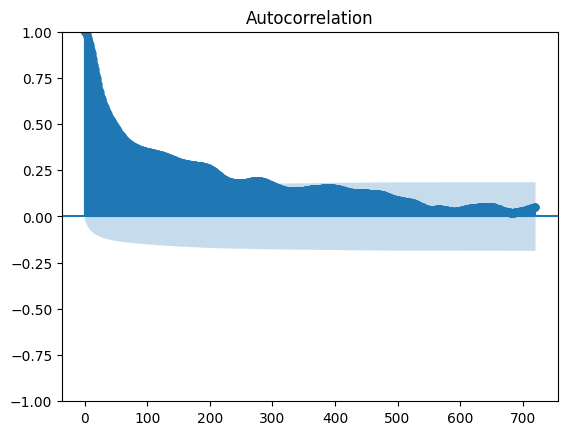

In [40]:
acf_test(chor_training_resampled_1H['PM_10'])

###### This cone pictures the confidence level (by default set to 95%). In other words, if the point is outside the cone (on white) you may say that with 95% probability is has a certain impact on values. All the points in the lag variable lie outside the cone, which means they all have certain impact on the future value

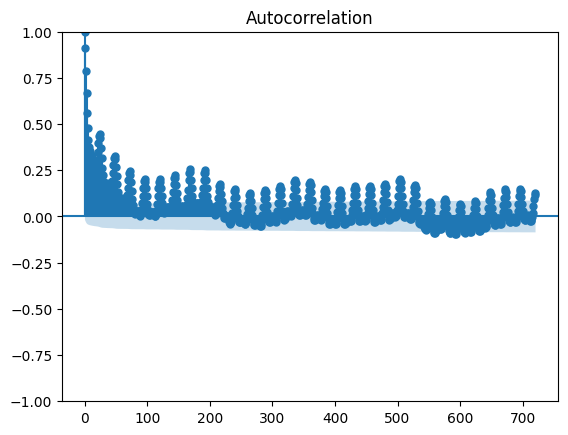

In [41]:
acf_test(chor_training_resampled_1H['NO2'])

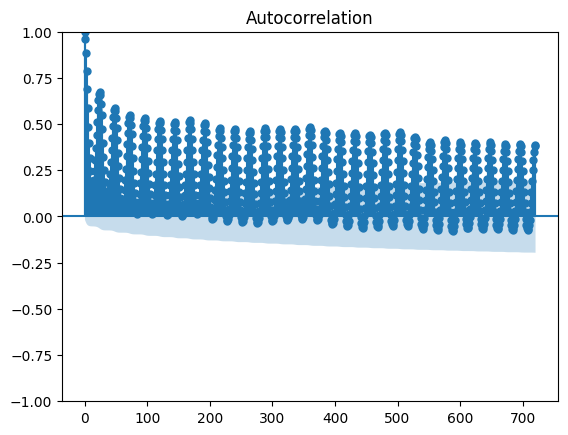

In [42]:
acf_test(chor_training_resampled_1H['O3'])

###### These plots tell :
###### 1. It's definitely needed to include lag variables as features since there are clearly impact from past values to future value. 
###### 2. With PM10,the lag impact falls over time. For NO2 and O3, there are clearly a daily cycle of lag impact ( peaks at 24th, 48th, etc bars)
###### 3. For PM10, after approximately 300 lags, there are no impact on the future values at later lags. For O3, the impact is still relevant at peaks even after 700 lags.
###### This will come in use when we choose lag variables for the model.


### Weekday/ weekend concentration distribution

In [43]:
pm10['day_of_week'] = pm10.index.dayofweek
no2['day_of_week'] = no2.index.dayofweek
o3['day_of_week'] = o3.index.dayofweek

<Axes: xlabel='day_of_week'>

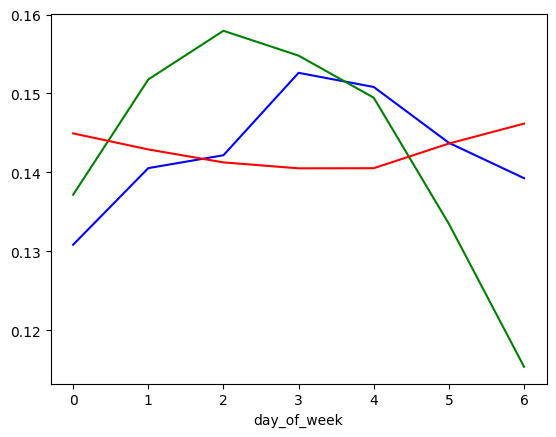

In [49]:
# concentrations grouped by day of week normalized
pm10_day_of_week = pm10['PM_10'].groupby(pm10['day_of_week']).mean()

pm10_day_of_week = pm10_day_of_week/sum(pm10_day_of_week)

pm10_day_of_week.plot(kind='line',color='blue')

no2_day_of_week = no2['NO2'].groupby(no2['day_of_week']).mean()

no2_day_of_week = no2_day_of_week/sum(no2_day_of_week)

no2_day_of_week.plot(kind='line',color='green')

o3_day_of_week = o3['O3'].groupby(o3['day_of_week']).mean()

o3_day_of_week = o3_day_of_week/sum(o3_day_of_week)

o3_day_of_week.plot(kind='line',color='red')

### Hour distribution

C:\Users\riven\AppData\Local\Temp\ipykernel_18916\2411825307.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='PM_10', data=pm10_reindexed, palette="Set2")


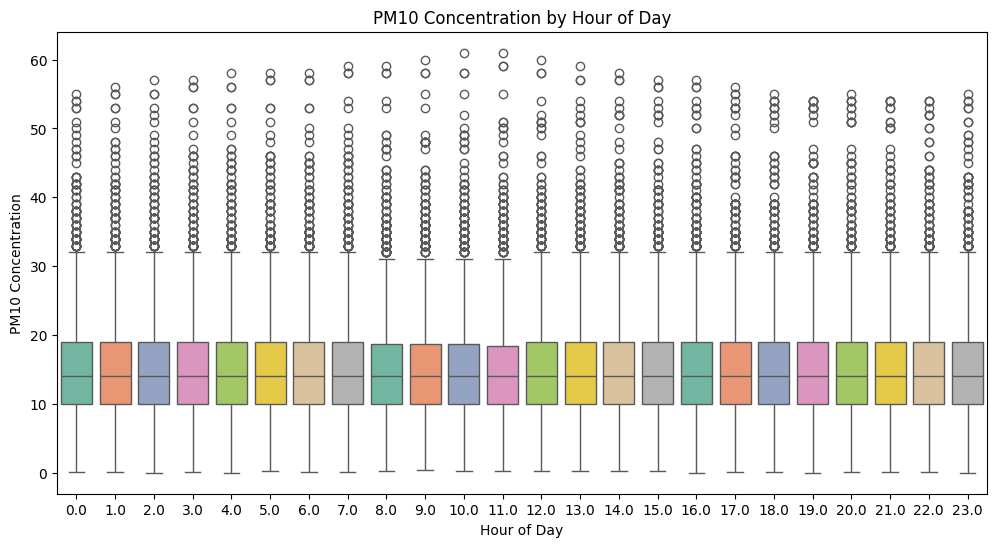

In [59]:
pm10['hour'] = pm10.index.hour
no2['hour'] = no2.index.hour
o3['hour'] = o3.index.hour

import seaborn as sns
import matplotlib.pyplot as plt

pm10_reindexed = pm10.reset_index()

# Assuming pm10 DataFrame has 'PM_10' and 'hour' columns
# Creating the violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='PM_10', data=pm10_reindexed, palette="Set2")

# Customizing the plot
plt.title('PM10 Concentration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('PM10 Concentration')

# Display the plot
plt.show()


C:\Users\riven\AppData\Local\Temp\ipykernel_18916\1580673298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='NO2', data=no2_reindexed, palette="Set2")


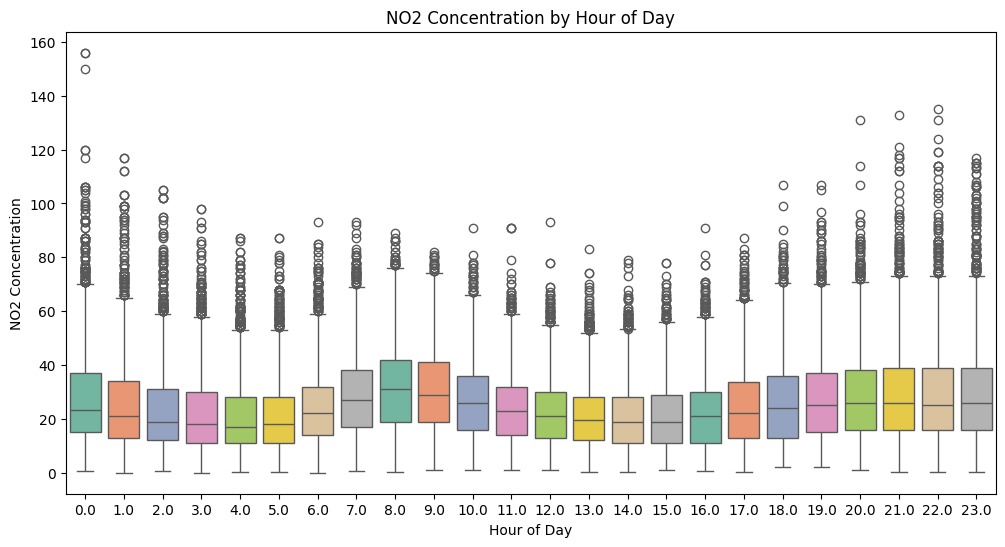

In [60]:
no2_reindexed = no2.reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='NO2', data=no2_reindexed, palette="Set2")

plt.title('NO2 Concentration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('NO2 Concentration')
plt.show()

C:\Users\riven\AppData\Local\Temp\ipykernel_18916\361577011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='O3', data=o3_reindexed, palette="Set2")


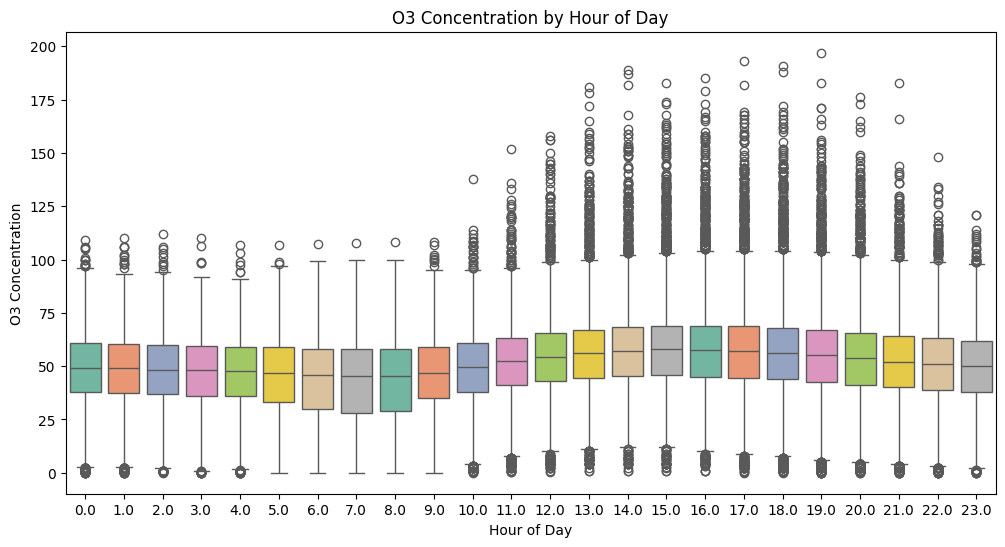

In [61]:
o3_reindexed = o3.reset_index()

plt.figure(figsize=(12, 6))

sns.boxplot(x='hour', y='O3', data=o3_reindexed, palette="Set2")

plt.title('O3 Concentration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('O3 Concentration')
plt.show()


In [62]:
# draw plot of PM_10, NO2, O3 group by hours
# define strike data

strike_period_1 = pd.date_range(start='2024-02-02 03:00', end='2024-02-03 03:00', freq='H')
strike_period_2 = pd.date_range(start='2024-02-15 03:00', end='2024-02-16 03:00', freq='H')
strike_period_3 = pd.date_range(start='2024-02-29 03:00', end='2024-03-02 03:00', freq='H')
strike_period_4 = pd.date_range(start='2024-03-05 03:00', end='2024-03-07 03:00', freq='H')

all_strike_periods = strike_period_1.append(strike_period_2).append(strike_period_3).append(strike_period_4)

strike_GDL_period_1 = pd.date_range(start='2024-01-10 02:00', end='2024-01-12 18:00', freq='H')
strike_GDL_period_2 = pd.date_range(start='2024-01-24 02:00', end='2024-01-29 18:00', freq='H')
strike_GDL_period_3 = pd.date_range(start='2024-03-12 02:00', end='2024-03-13 02:00', freq='H')

strike_GDL = strike_GDL_period_1.append(strike_GDL_period_2).append(strike_GDL_period_3)





C:\Users\riven\AppData\Local\Temp\ipykernel_18916\3581989516.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  strike_period_1 = pd.date_range(start='2024-02-02 03:00', end='2024-02-03 03:00', freq='H')
C:\Users\riven\AppData\Local\Temp\ipykernel_18916\3581989516.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  strike_period_2 = pd.date_range(start='2024-02-15 03:00', end='2024-02-16 03:00', freq='H')
C:\Users\riven\AppData\Local\Temp\ipykernel_18916\3581989516.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  strike_period_3 = pd.date_range(start='2024-02-29 03:00', end='2024-03-02 03:00', freq='H')
C:\Users\riven\AppData\Local\Temp\ipykernel_18916\3581989516.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  strike_period_4 = pd.date_range(start='2024-03-05 03:00'

In [64]:
#strike data divided by weekday and weekend

strike_weekday = all_strike_periods[all_strike_periods.weekday < 5]
strike_weekend = all_strike_periods[all_strike_periods.weekday >= 5]

strike_GDL_weekday = strike_GDL[strike_GDL.weekday < 5]
strike_GDL_weekend = strike_GDL[strike_GDL.weekday >= 5]

print('Strike weekday:', strike_weekday.shape[0])
print('Strike weekend:', strike_weekend.shape[0])
print('strike_GDL weekday:', strike_GDL_weekday.shape[0])
print('strike_GDL weekend:', strike_GDL_weekend.shape[0])

Strike weekday: 140
Strike weekend: 8
strike_GDL weekday: 179
strike_GDL weekend: 48


In [32]:
#the periods 1 week prior to each strike period, with the same range as the strike period
pre_strike_period_1= pd.date_range(start='2024-01-26 03:00', end='2024-01-27 03:00', freq='H')
pre_strike_period_2 = pd.date_range(start='2024-02-08 03:00', end='2024-02-09 03:00', freq='H')
pre_strike_period_3 = pd.date_range(start='2024-02-22 03:00', end='2024-02-23 03:00', freq='H')
pre_strike_period_4 = pd.date_range(start='2024-02-26 03:00', end='2024-02-28 03:00', freq='H')

all_pre_strike_periods = pre_strike_period_1.append(pre_strike_period_2).append(pre_strike_period_3).append(pre_strike_period_4)

pre_GDL_strike_period_1 = pd.date_range(start='2024-01-03 02:00', end='2024-01-05 18:00', freq='H')
pre_GDL_strike_period_2 = pd.date_range(start='2024-01-17 02:00', end='2024-01-22 18:00', freq='H')
pre_GDL_strike_period_3 = pd.date_range(start='2024-03-05 02:00', end='2024-03-06 02:00', freq='H')

pre_GDL_strike = pre_GDL_strike_period_1.append(pre_GDL_strike_period_2).append(pre_GDL_strike_period_3)
pre_strikes = all_pre_strike_periods.append(pre_GDL_strike)

C:\Users\riven\AppData\Local\Temp\ipykernel_11996\3524025984.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pre_strike_period_1= pd.date_range(start='2024-01-26 03:00', end='2024-01-27 03:00', freq='H')
C:\Users\riven\AppData\Local\Temp\ipykernel_11996\3524025984.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pre_strike_period_2 = pd.date_range(start='2024-02-08 03:00', end='2024-02-09 03:00', freq='H')
C:\Users\riven\AppData\Local\Temp\ipykernel_11996\3524025984.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pre_strike_period_3 = pd.date_range(start='2024-02-22 03:00', end='2024-02-23 03:00', freq='H')
C:\Users\riven\AppData\Local\Temp\ipykernel_11996\3524025984.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pre_strike_period_4 = pd.date_range(start='20

In [33]:
pm10_strike = pm10[pm10.index.isin(all_strike_periods)]
no2_strike = no2[no2.index.isin(all_strike_periods)]
o3_strike = o3[o3.index.isin(all_strike_periods)]

pm10_GDL = pm10[pm10.index.isin(strike_GDL)]
no2_GDL = no2[no2.index.isin(strike_GDL)]
o3_GDL = o3[o3.index.isin(strike_GDL)]

pm10_non_strike = pm10[pm10.index.isin(all_pre_strike_periods)]
no2_non_strike = no2[no2.index.isin(all_pre_strike_periods)]
o3_non_strike = o3[o3.index.isin(all_pre_strike_periods)]

pm10_non_GDL = pm10[pm10.index.isin(pre_GDL_strike)]
no2_non_GDL = no2[no2.index.isin(pre_GDL_strike)]
o3_non_GDL = o3[o3.index.isin(pre_GDL_strike)]



In [43]:
pm10_strike_plot = pm10_strike[['PM_10']]
pm10_non_strike_plot = pm10_non_strike[['PM_10']]

no2_strike_plot = no2_strike[['NO2']]
no2_non_strike_plot = no2_non_strike[['NO2']]
o3_strike_plot = o3_strike[['O3']]
o3_non_strike_plot = o3_non_strike[['O3']]

pm10_GDL_plot = pm10_GDL[['PM_10']]
no2_GDL_plot = no2_GDL[['NO2']]
o3_GDL_plot = o3_GDL[['O3']]

pm10_non_GDL_plot = pm10_non_GDL[['PM_10']]
no2_non_GDL_plot = no2_non_GDL[['NO2']]
o3_non_GDL_plot = o3_non_GDL[['O3']]


hourly_pm10_strike = pm10_strike_plot.groupby(pm10_strike_plot.index.hour).mean()
hourly_pm10_non_strike = pm10_non_strike_plot.groupby(pm10_non_strike_plot.index.hour).mean()
hourly_pm10_GDL = pm10_GDL_plot.groupby(pm10_GDL_plot.index.hour).mean()
hourly_pm10_non_GDL = pm10_non_GDL_plot.groupby(pm10_non_GDL_plot.index.hour).mean()

hourly_no2_strike = no2_strike_plot.groupby(no2_strike_plot.index.hour).mean()
hourly_no2_non_strike = no2_non_strike_plot.groupby(no2_non_strike_plot.index.hour).mean()
hourly_no2_GDL = no2_GDL_plot.groupby(no2_GDL_plot.index.hour).mean()
hourly_no2_non_GDL = no2_non_GDL_plot.groupby(no2_non_GDL_plot.index.hour).mean()

hourly_o3_strike = o3_strike_plot.groupby(o3_strike_plot.index.hour).mean()
hourly_o3_non_strike = o3_non_strike_plot.groupby(o3_non_strike_plot.index.hour).mean()
hourly_o3_GDL = o3_GDL_plot.groupby(o3_GDL_plot.index.hour).mean()
hourly_o3_non_GDL = o3_non_GDL_plot.groupby(o3_non_GDL_plot.index.hour).mean()

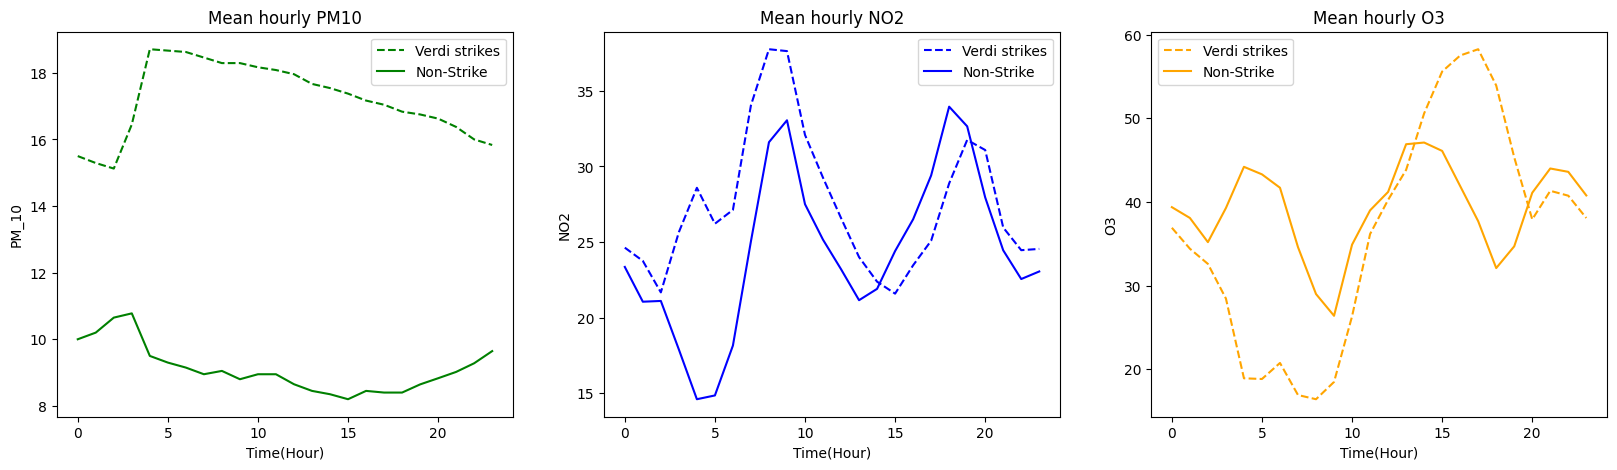

In [67]:
#plot PM_10, NO2, O3 group by hours


fig, ax = plt.subplots(1,3, figsize=(20, 5))
ax[0].plot(hourly_pm10_strike, label='Verdi strikes', color='green',linestyle='--')
ax[0].plot(hourly_pm10_non_strike, label='Non-Strike', color='green')

ax[0].set_title('Mean hourly PM10')
ax[0].set_xlabel('Time(Hour)')
ax[0].set_ylabel('PM_10')
ax[0].legend()

ax[1].plot(hourly_no2_strike, label='Verdi strikes', color='blue',linestyle='--')
ax[1].plot(hourly_no2_non_strike, label='Non-Strike', color='blue')

ax[1].set_title('Mean hourly NO2')
ax[1].set_xlabel('Time(Hour)')
ax[1].set_ylabel('NO2')
ax[1].legend()

ax[2].plot(hourly_o3_strike, label='Verdi strikes', color='orange',linestyle='--')
ax[2].plot(hourly_o3_non_strike, label='Non-Strike', color='orange')

ax[2].set_title('Mean hourly O3')
ax[2].legend()
ax[2].set_xlabel('Time(Hour)')
ax[2].set_ylabel('O3')

#drop the last subplot

plt.show()

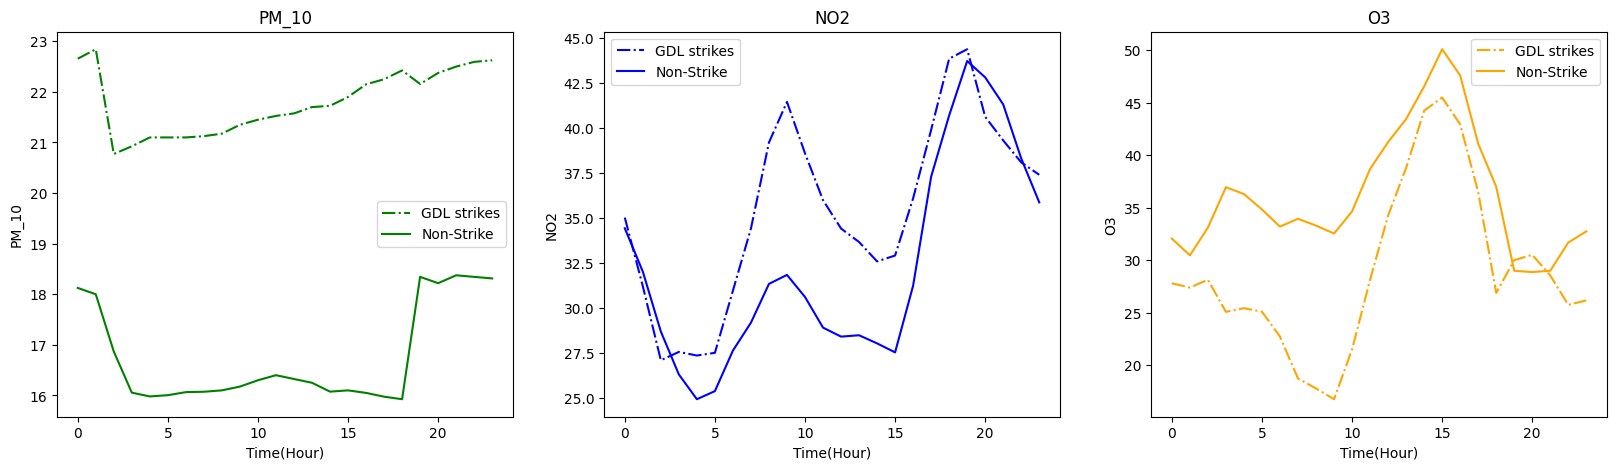

In [64]:
#plot PM_10, NO2, O3 group by hours


fig, ax = plt.subplots(1,3, figsize=(20, 5))
ax[0].plot(hourly_pm10_GDL, label='GDL strikes', color='green',linestyle='-.')
ax[0].plot(hourly_pm10_non_GDL, label='Non-Strike', color='green')

ax[0].set_title('PM_10')
ax[0].set_xlabel('Time(Hour)')
ax[0].set_ylabel('PM_10')
ax[0].legend()

ax[1].plot(hourly_no2_GDL, label='GDL strikes', color='blue',linestyle='-.')
ax[1].plot(hourly_no2_non_GDL, label='Non-Strike', color='blue')

ax[1].set_title('NO2')
ax[1].set_xlabel('Time(Hour)')
ax[1].set_ylabel('NO2')
ax[1].legend()

ax[2].plot(hourly_o3_GDL, label='GDL strikes', color='orange',linestyle='-.')
ax[2].plot(hourly_o3_non_GDL, label='Non-Strike', color='orange')

ax[2].set_title('O3')
ax[2].legend()
ax[2].set_xlabel('Time(Hour)')
ax[2].set_ylabel('O3')

#drop the last subplot

plt.show()

In [8]:
chor_strike = chor_training[chor_training.index.isin(all_strike_periods)]
chor_GDL = chor_training[chor_training.index.isin(strike_GDL)]
chor_non_strike = chor_training[chor_training.index.isin(all_pre_strike_periods)]
chor_non_GDL = chor_training[chor_training.index.isin(pre_GDL_strike)]

cle_strike = cle_training[cle_training.index.isin(all_strike_periods)]
cle_GDL = cle_training[cle_training.index.isin(strike_GDL)]
cle_non_strike = cle_training[cle_training.index.isin(all_pre_strike_periods)]
cle_non_GDL = cle_training[cle_training.index.isin(pre_GDL_strike)]

turi_strike = turi_training[turi_training.index.isin(all_strike_periods)]
turi_GDL = turi_training[turi_training.index.isin(strike_GDL)]
turi_non_strike = turi_training[turi_training.index.isin(all_pre_strike_periods)]
turi_non_GDL = turi_training[turi_training.index.isin(pre_GDL_strike)]

rod_strike = rod_training[rod_training.index.isin(all_strike_periods)]
rod_GDL = rod_training[rod_training.index.isin(strike_GDL)]
rod_non_strike = rod_training[rod_training.index.isin(all_pre_strike_periods)]
rod_non_GDL = rod_training[rod_training.index.isin(pre_GDL_strike)]

In [96]:
#group AQI counts by day


AQI
gut         91
sehr gut    42
mäßig       15
Name: count, dtype: int64

In [97]:
chor_non_strike['AQI'].value_counts()

AQI
sehr gut    61
gut         60
mäßig        3
Name: count, dtype: int64

In [98]:
chor_GDL['AQI'].value_counts()

AQI
gut         107
mäßig        60
sehr gut     60
Name: count, dtype: int64

In [99]:
chor_non_GDL['AQI'].value_counts()

AQI
gut         126
mäßig        56
sehr gut     45
Name: count, dtype: int64

In [10]:
#counts daily AQI values for each location
chor_strike.info()

chor_strike_AQI =chor_strike['AQI']

aqi_categories = ['sehr gut', 'gut', 'mäßig', 'schlecht', 'sehr schlecht']

#calculate daily frequency of each AQI category



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2024-02-02 03:00:00 to 2024-03-07 03:00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   F[%]           148 non-null    float64
 1   T[°C]          148 non-null    float64
 2   WG[m/s]        148 non-null    float64
 3   WR             148 non-null    float64
 4   Stationscode   148 non-null    object 
 5   PM_10          148 non-null    float64
 6   O3             148 non-null    float64
 7   NO2            148 non-null    float64
 8   AQI            148 non-null    object 
 9   Hour           148 non-null    float64
 10  Day            148 non-null    float64
 11  Month          148 non-null    float64
 12  Year           148 non-null    float64
 13  Weekday        148 non-null    float64
 14  holiday        148 non-null    int64  
 15  Precipitation  148 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 19.7+ KB


In [11]:
chor_strike_AQI

Date
2024-02-02 03:00:00    sehr gut
2024-02-02 04:00:00         gut
2024-02-02 05:00:00         gut
2024-02-02 06:00:00         gut
2024-02-02 07:00:00         gut
                         ...   
2024-03-06 23:00:00    sehr gut
2024-03-07 00:00:00         gut
2024-03-07 01:00:00         gut
2024-03-07 02:00:00         gut
2024-03-07 03:00:00         gut
Name: AQI, Length: 148, dtype: object

In [95]:
start_date = '2024-01-01 00:00:00'
end_date = '2024-03-31 23:00:00'

date_range = pd.date_range(start=start_date, end=end_date, freq='H')

chor_2024 = chor_training[chor_training.index.isin(date_range)]
cle_2024 = cle_training[cle_training.index.isin(date_range)]
turi_2024 = turi_training[turi_training.index.isin(date_range)]
rod_2024 = rod_training[rod_training.index.isin(date_range)]


C:\Users\riven\AppData\Local\Temp\ipykernel_11996\1648409281.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='H')


In [21]:
profile_chor = ProfileReport(chor_training, title='Chorweiler AQI Profile Report',tsmode=True, explorative=True)
profile_cle = ProfileReport(cle_training, title='Clevischer AQI Profile Report',tsmode=True, explorative=True)
profile_turi = ProfileReport(turi_training, title='Turi AQI Profile Report',tsmode=True, explorative=True)
profile_rod = ProfileReport(rod_training, title='Rod AQI Profile Report',tsmode=True, explorative=True)

In [24]:
#drop NaT values
chor_training = chor_training.interpolate(method='linear')

C:\Users\riven\AppData\Local\Temp\ipykernel_11996\3886031080.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  chor_training = chor_training.interpolate(method='linear')


In [50]:
#group by day
chor_2024_daily = chor_2024[['PM_10', 'NO2', 'O3']]
cle_2024_daily = cle_2024[['PM_10', 'NO2']]
turi_2024_daily = turi_2024[['PM_10', 'NO2']]
rod_2024_daily = rod_2024[['PM_10', 'NO2', 'O3']]

chor_2024_daily = chor_2024_daily.resample('D').mean()
cle_2024_daily = cle_2024_daily.resample('D').mean()
turi_2024_daily = turi_2024_daily.resample('D').mean()
rod_2024_daily = rod_2024_daily.resample('D').mean()


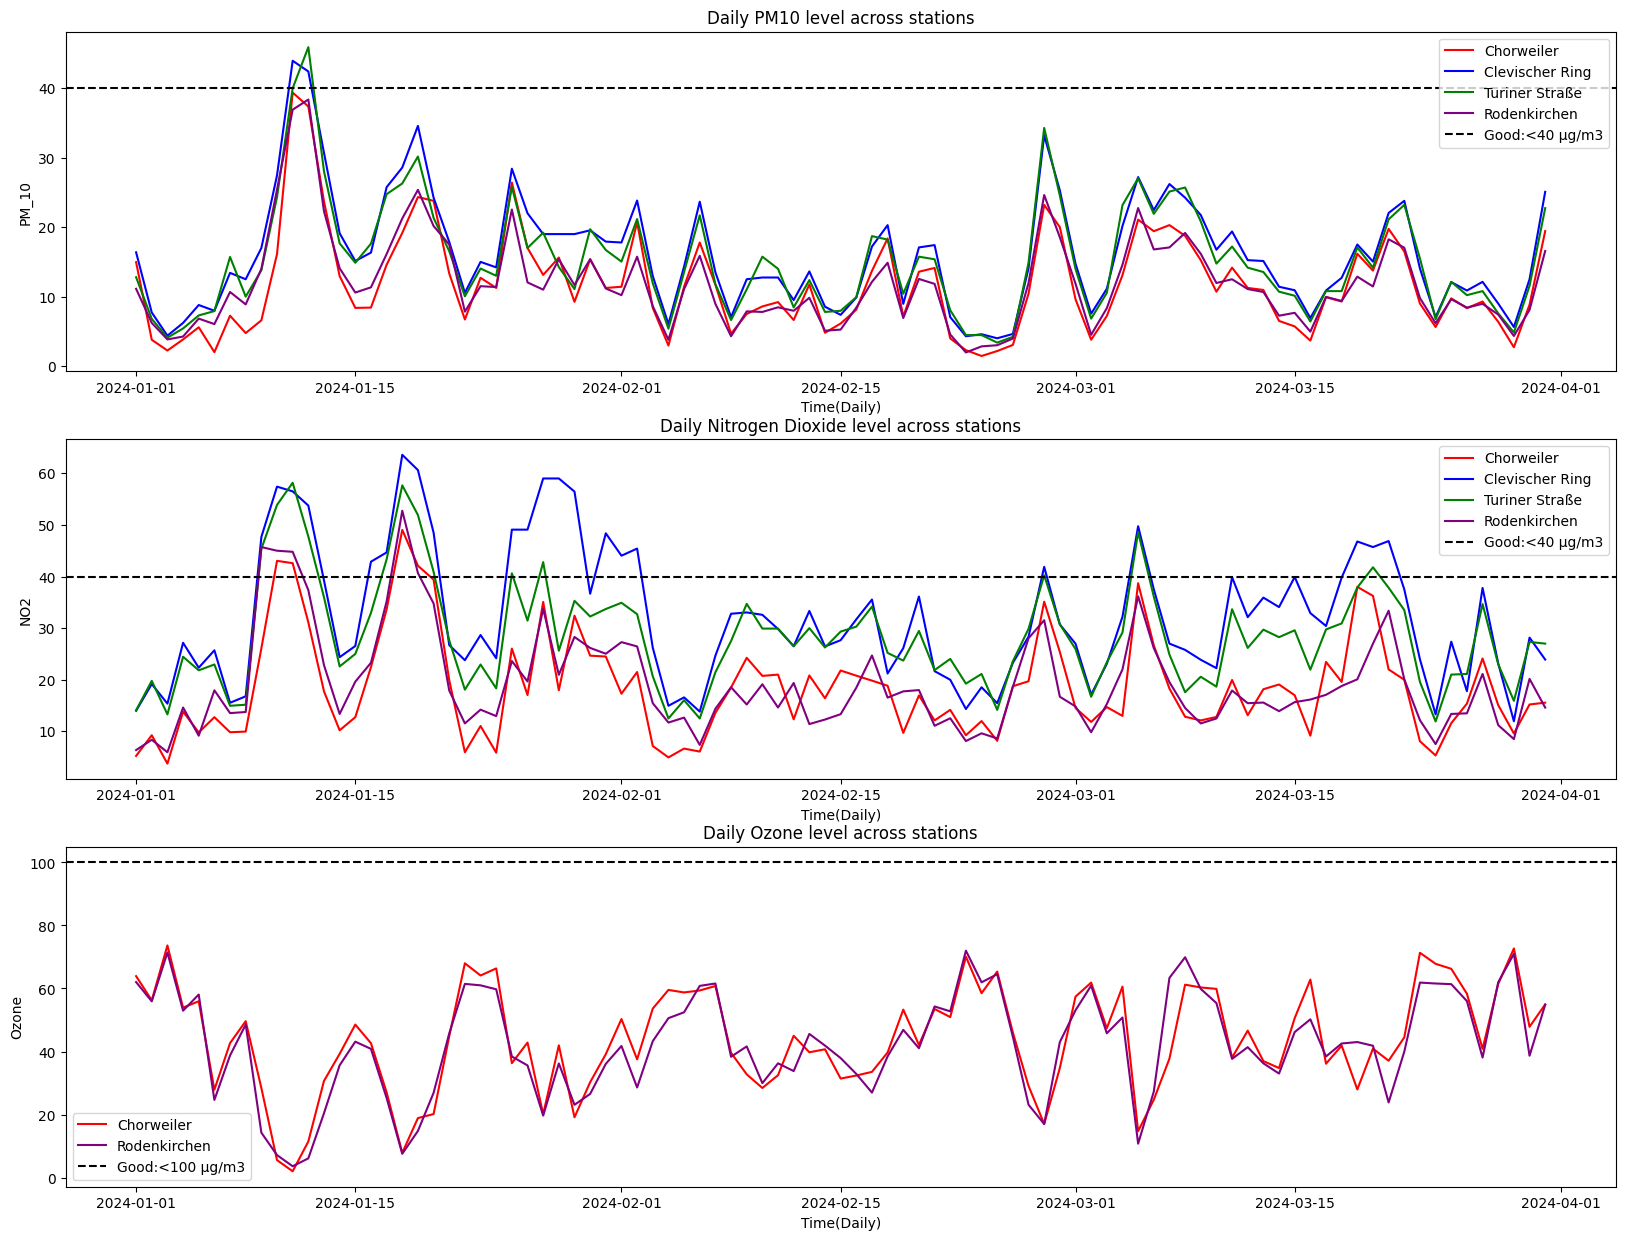

In [69]:
# compare pollutant values across locations
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(3,1, figsize=(20, 15))
ax[0].plot(chor_2024_daily['PM_10'], label='Chorweiler', color='red')
ax[0].plot(cle_2024_daily['PM_10'], label='Clevischer Ring', color='blue')
ax[0].plot(turi_2024_daily['PM_10'], label='Turiner Straße', color='green')
ax[0].plot(rod_2024_daily['PM_10'], label='Rodenkirchen', color='purple')
#draw a horizontal line for good values of 40
ax[0].axhline(y=40,label='Good:<40 µg/m3', color='black', linestyle='--')
ax[0].set_title('Daily PM10 level across stations')
ax[0].set_xlabel('Time(Daily)')
ax[0].set_ylabel('PM_10')
ax[0].legend()


ax[1].plot(chor_2024_daily['NO2'], label='Chorweiler', color='red')
ax[1].plot(cle_2024_daily['NO2'], label='Clevischer Ring', color='blue')
ax[1].plot(turi_2024_daily['NO2'], label='Turiner Straße', color='green')
ax[1].plot(rod_2024_daily['NO2'], label='Rodenkirchen', color='purple')
ax[1].axhline(y=40,label='Good:<40 µg/m3', color='black', linestyle='--')
ax[1].set_title('Daily Nitrogen Dioxide level across stations')
ax[1].set_xlabel('Time(Daily)')
ax[1].set_ylabel('NO2')
ax[1].legend()

ax[2].plot(chor_2024_daily['O3'], label='Chorweiler', color='red')
ax[2].plot(rod_2024_daily['O3'], label='Rodenkirchen', color='purple')
ax[2].set_title('Daily Ozone level across stations')
ax[2].set_xlabel('Time(Daily)')
ax[2].set_ylabel('Ozone')
ax[2].axhline(y=100,label='Good:<100 µg/m3', color='black', linestyle='--')
ax[2].legend()

plt.show()

In [96]:

# Sample data (replace with your actual data)


# Create a dictionary of AQI values for each location
#rearrange the values of AQI to sehr gut, gut, mäßig, schlecht, sehr schlecht
new_order = ['sehr gut', 'gut', 'mäßig', 'schlecht', 'sehr schlecht']
chor_2024['AQI'] = pd.Categorical(chor_2024['AQI'], categories=new_order, ordered=True)
-




C:\Users\riven\AppData\Local\Temp\ipykernel_11996\3034023811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chor_2024['AQI'] = pd.Categorical(chor_2024['AQI'], categories=new_order, ordered=True)


In [97]:
cle_2024['AQI'] = pd.Categorical(cle_2024['AQI'], categories=new_order, ordered=True)
turi_2024['AQI'] = pd.Categorical(turi_2024['AQI'], categories=new_order, ordered=True)
rod_2024['AQI'] = pd.Categorical(rod_2024['AQI'], categories=new_order, ordered=True)


C:\Users\riven\AppData\Local\Temp\ipykernel_11996\1906067862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cle_2024['AQI'] = pd.Categorical(cle_2024['AQI'], categories=new_order, ordered=True)
C:\Users\riven\AppData\Local\Temp\ipykernel_11996\1906067862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turi_2024['AQI'] = pd.Categorical(turi_2024['AQI'], categories=new_order, ordered=True)
C:\Users\riven\AppData\Local\Temp\ipykernel_11996\1906067862.py:3: SettingWithCopyWarning: 
A value is trying to

In [101]:
chor_2024_strike = chor_2024[chor_2024.index.isin(all_strike_periods)]
cle_2024_strike = cle_2024[cle_2024.index.isin(all_strike_periods)]
turi_2024_strike = turi_2024[turi_2024.index.isin(all_strike_periods)]
rod_2024_strike = rod_2024[rod_2024.index.isin(all_strike_periods)]

chor_2024_GDL = chor_2024[chor_2024.index.isin(strike_GDL)]
cle_2024_GDL = cle_2024[cle_2024.index.isin(strike_GDL)]
turi_2024_GDL = turi_2024[turi_2024.index.isin(strike_GDL)]
rod_2024_GDL = rod_2024[rod_2024.index.isin(strike_GDL)]

chor_2024_non_strike = chor_2024[chor_2024.index.isin(all_pre_strike_periods)]
cle_2024_non_strike = cle_2024[cle_2024.index.isin(all_pre_strike_periods)]
turi_2024_non_strike = turi_2024[turi_2024.index.isin(all_pre_strike_periods)]
rod_2024_non_strike = rod_2024[rod_2024.index.isin(all_pre_strike_periods)]


chor_2024_non_GDL = chor_2024[chor_2024.index.isin(pre_GDL_strike)]
cle_2024_non_GDL = cle_2024[cle_2024.index.isin(pre_GDL_strike)]
turi_2024_non_GDL = turi_2024[turi_2024.index.isin(pre_GDL_strike)]
rod_2024_non_GDL = rod_2024[rod_2024.index.isin(pre_GDL_strike)]



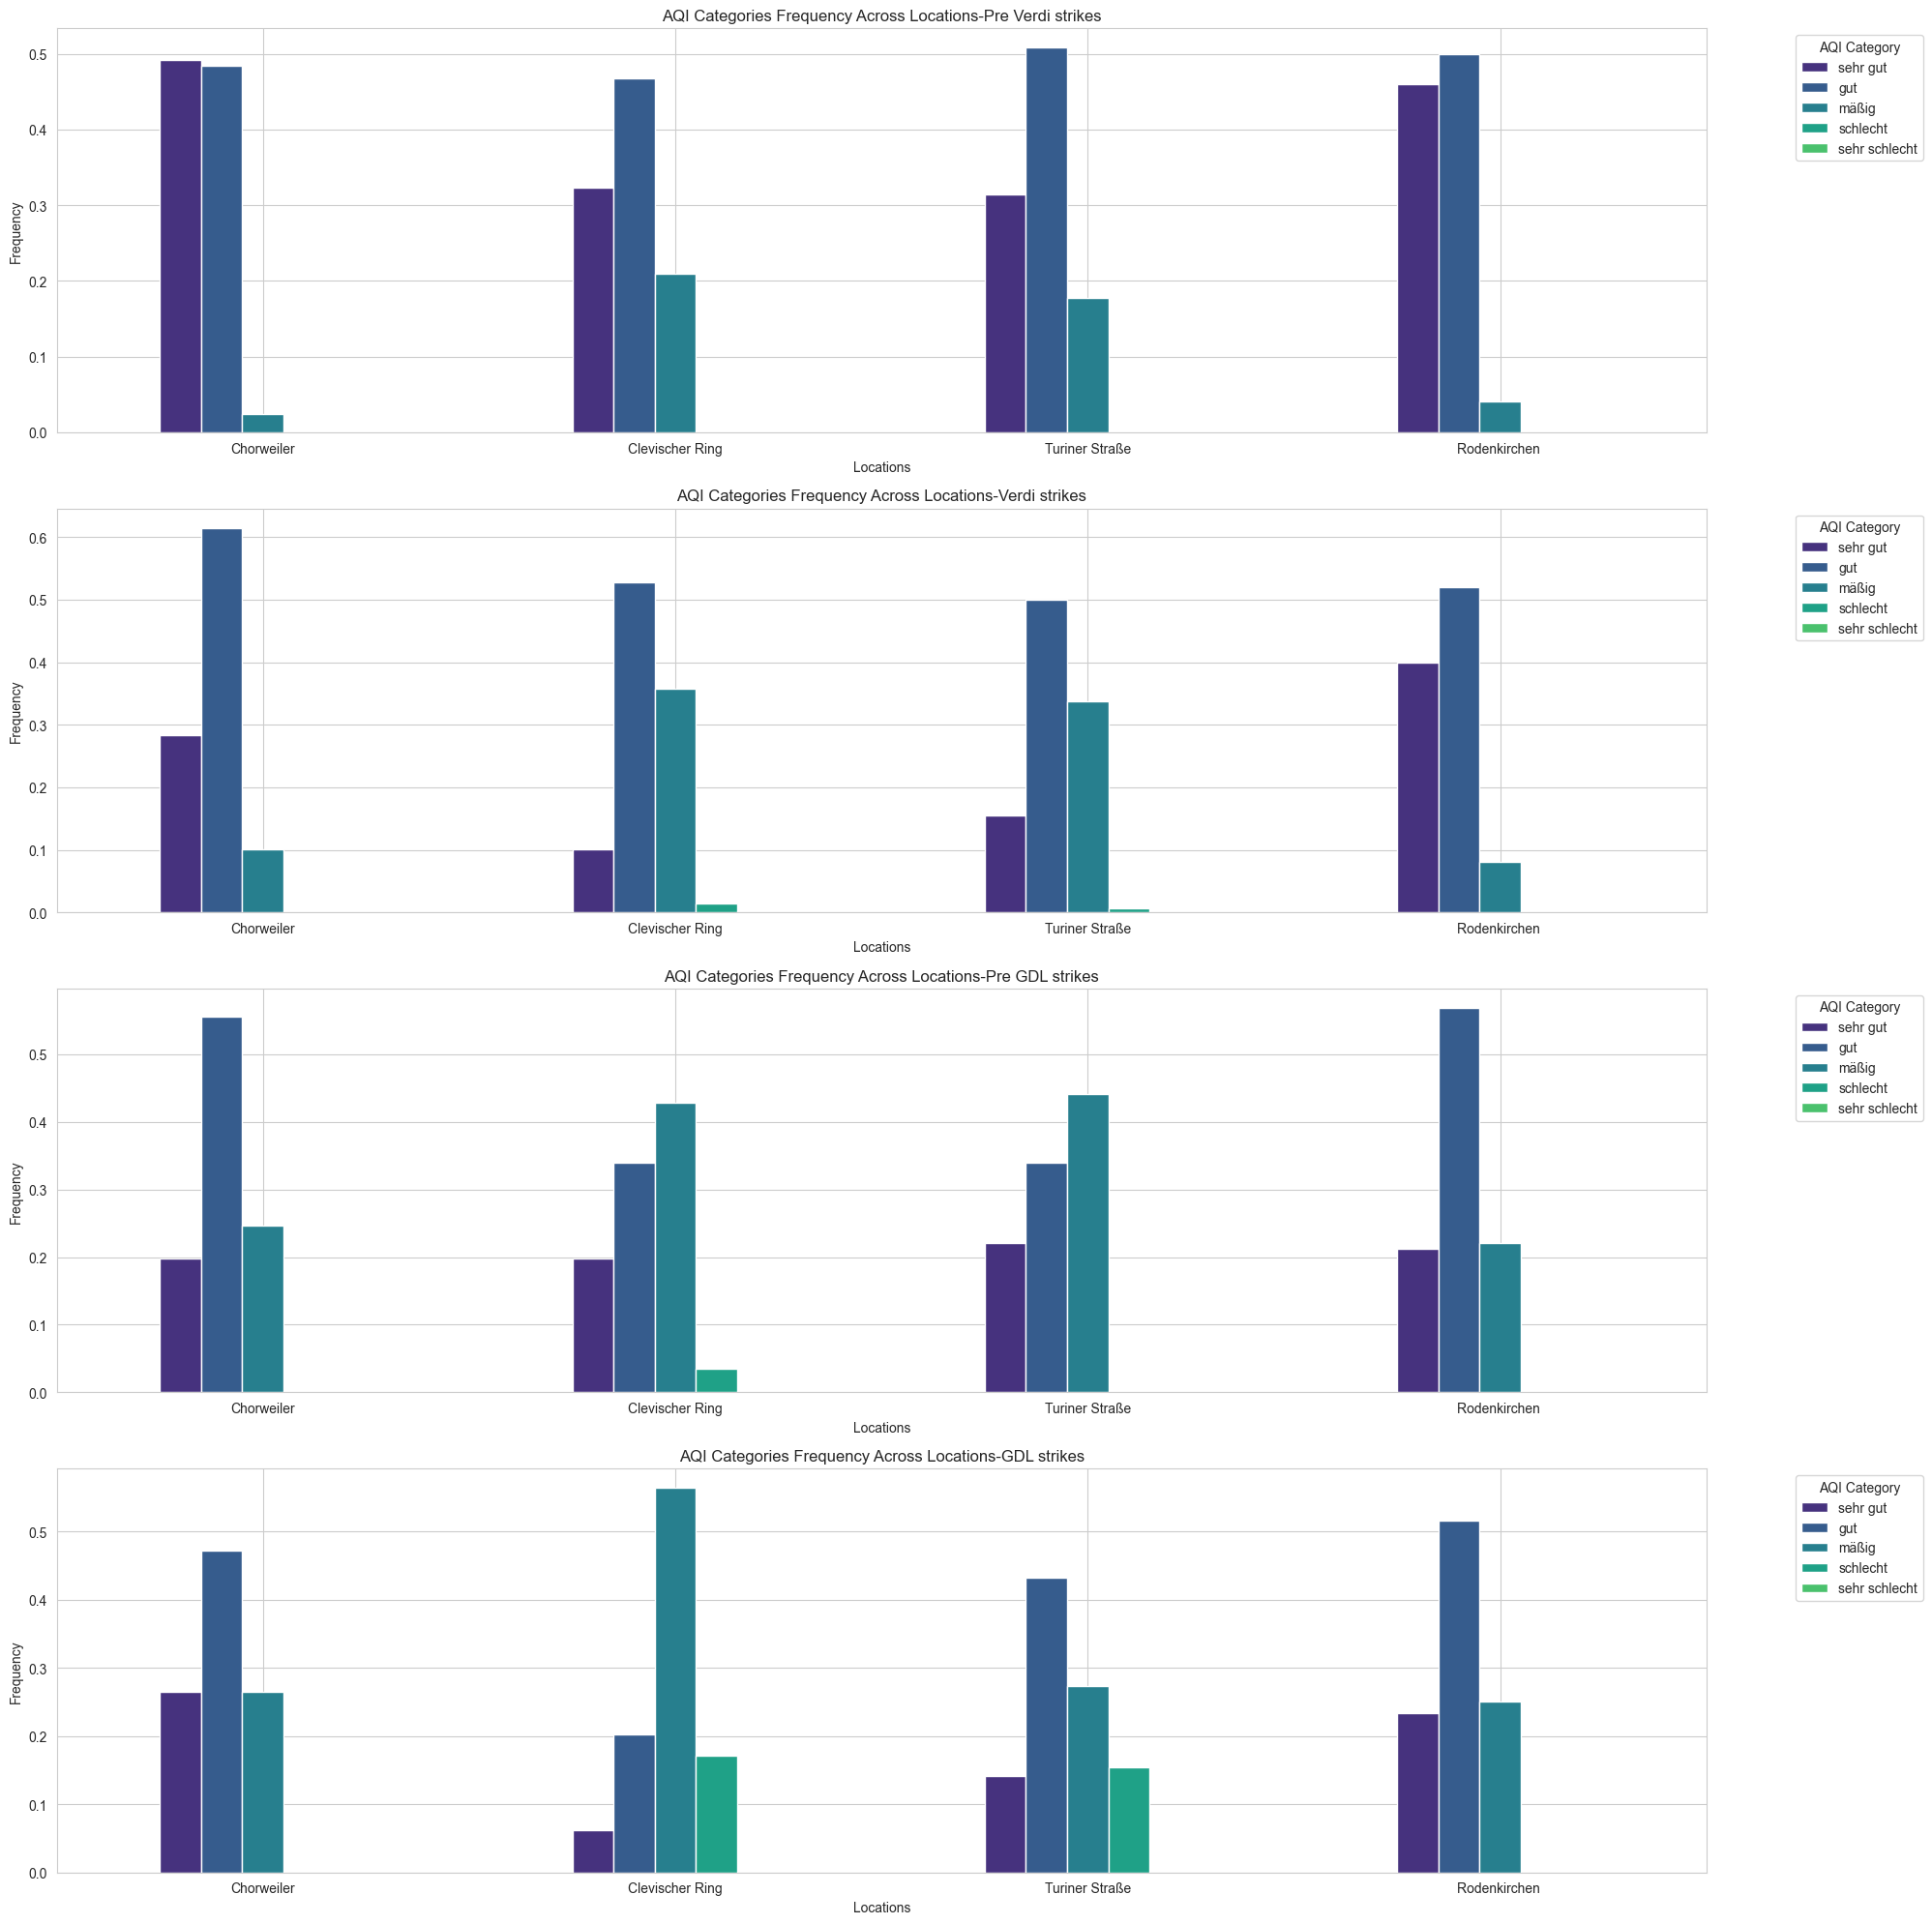

In [112]:






aqi_data_non_strike = {
    'Chorweiler': chor_2024_non_strike['AQI'].value_counts(normalize=True),
    'Clevischer Ring': cle_2024_non_strike['AQI'].value_counts(normalize=  True),
    'Turiner Straße': turi_2024_non_strike['AQI'].value_counts(normalize=True),
    'Rodenkirchen ': rod_2024_non_strike['AQI'].value_counts(normalize=True)
}

# Convert dictionary to DataFrame
aqi_df_non_strike = pd.DataFrame(aqi_data_non_strike).fillna(0)



aqi_data_strike ={
    'Chorweiler': chor_2024_strike['AQI'].value_counts(normalize=True),
    'Clevischer Ring': cle_2024_strike['AQI'].value_counts(normalize=True  ),
    'Turiner Straße': turi_2024_strike['AQI'].value_counts(normalize=True),
    'Rodenkirchen ': rod_2024_strike['AQI'].value_counts(normalize=True)

}

# Convert dictionary to DataFrame
aqi_df_strike = pd.DataFrame(aqi_data_strike).fillna(0)



aqi_data_GDL ={
    'Chorweiler': chor_2024_GDL['AQI'].value_counts(normalize=True),
    'Clevischer Ring': cle_2024_GDL['AQI'].value_counts(normalize=  True),
    'Turiner Straße': turi_2024_GDL['AQI'].value_counts(normalize=True),
    'Rodenkirchen ': rod_2024_GDL['AQI'].value_counts(normalize=True)

}

# Convert dictionary to DataFrame
aqi_df_GDL = pd.DataFrame(aqi_data_GDL).fillna(0)




aqi_data_non_GDL ={
    
    'Chorweiler': chor_2024_non_GDL['AQI'].value_counts(normalize=True),
    'Clevischer Ring': cle_2024_non_GDL['AQI'].value_counts(normalize=True),
    'Turiner Straße': turi_2024_non_GDL['AQI'].value_counts(normalize=True),
    'Rodenkirchen ': rod_2024_non_GDL['AQI'].value_counts(normalize=True)
}

# Convert dictionary to DataFrame
aqi_df_non_GDL = pd.DataFrame(aqi_data_non_GDL).fillna(0)







fig, ax = plt.subplots(4,1, figsize=(20, 20))
sns.set_style('whitegrid')

# Plot the bar chart

aqi_df_non_strike.T.plot(kind='bar',ax=ax[0], color= sns.color_palette("viridis"))
ax[0].set_title('AQI Categories Frequency Across Locations-Pre Verdi strikes')


aqi_df_strike.T.plot(kind='bar',ax= ax[1], color= sns.color_palette("viridis"))
ax[1].set_title('AQI Categories Frequency Across Locations-Verdi strikes')


aqi_df_non_GDL.T.plot(kind='bar',ax=ax[2], color= sns.color_palette("viridis"))
ax[2].set_title('AQI Categories Frequency Across Locations-Pre GDL strikes')


aqi_df_GDL.T.plot(kind='bar',ax= ax[3], color= sns.color_palette("viridis"))
ax[3].set_title('AQI Categories Frequency Across Locations-GDL strikes')






for axes in ax:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=0)  # Rotate x-axis labels horizontally
    axes.set_xlabel('Locations')
    axes.set_ylabel('Frequency')
    axes.legend(title='AQI Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

 

In [113]:
aqi_data_GDL

{'Chorweiler': AQI
 gut              0.471366
 sehr gut         0.264317
 mäßig            0.264317
 schlecht         0.000000
 sehr schlecht    0.000000
 Name: proportion, dtype: float64,
 'Clevischer Ring': AQI
 mäßig            0.563877
 gut              0.202643
 schlecht         0.171806
 sehr gut         0.061674
 sehr schlecht    0.000000
 Name: proportion, dtype: float64,
 'Turiner Straße': AQI
 gut              0.431718
 mäßig            0.273128
 schlecht         0.154185
 sehr gut         0.140969
 sehr schlecht    0.000000
 Name: proportion, dtype: float64,
 'Rodenkirchen ': AQI
 gut              0.515419
 mäßig            0.251101
 sehr gut         0.233480
 schlecht         0.000000
 sehr schlecht    0.000000
 Name: proportion, dtype: float64}